# Notebook 4: Feature Engineering

Foda-se essa porra. Se for preciso fazer feature engineering eu volto nesse notebook!
Vamos direto para a parte de 

In [115]:
import pandas as pd
import featuretools as ft

In [116]:
X = pd.read_hdf('X.h5', key='X')
y = pd.read_hdf('y.h5', key='y')
# X = X.set_index(['engine_no', 'time'])
# X = X.set_index(['time'])
# X = X.drop(['index'], axis=1)

In [117]:
# index = [i for i in range(len(X))]

In [118]:
# X.reindex(index)
X.head(5)

,op_setting_1,op_setting_2,op_setting_3,sensor_meas_1,sensor_meas_2,sensor_meas_3,sensor_meas_4,sensor_meas_5,sensor_meas_6,sensor_meas_7,...,sensor_meas_19,sensor_meas_20,sensor_meas_21,index,time,engine_no,time_in_cycles,sensor_meas_17,sensor_meas_18,engine_family
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,100.0,39.06,23.4190,0,2000-01-01 00:00:00,1.0,1.0,392.0,2388.0,1.0
1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,...,100.0,14.73,8.8071,0,2000-01-01 00:00:00,1.0,1.0,334.0,2223.0,2.0
2,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,21.61,553.97,...,100.0,39.11,23.3537,0,2000-01-01 00:00:00,1.0,1.0,391.0,2388.0,3.0
3,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,...,100.0,10.62,6.3670,0,2000-01-01 00:00:00,1.0,1.0,330.0,2212.0,4.0
4,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,...,100.0,24.37,14.6552,1,2000-01-01 00:10:00,1.0,2.0,361.0,2324.0,4.0


In [119]:
X.dtypes

op_setting_1             float64
op_setting_2             float64
op_setting_3             float64
sensor_meas_1            float64
sensor_meas_2            float64
sensor_meas_3            float64
sensor_meas_4            float64
sensor_meas_5            float64
sensor_meas_6            float64
sensor_meas_7            float64
sensor_meas_8            float64
sensor_meas_9            float64
sensor_meas_10           float64
sensor_meas_11           float64
sensor_meas_12           float64
sensor_meas_13           float64
sensor_meas_14           float64
sensor_meas_15           float64
sensor_meas_16           float64
sensor_meas_19           float64
sensor_meas_20           float64
sensor_meas_21           float64
index                      int64
time              datetime64[ns]
engine_no                float64
time_in_cycles           float64
sensor_meas_17           float64
sensor_meas_18           float64
engine_family            float64
dtype: object

In [120]:
X = X.drop(['index'], axis=1)

**Date/time features**

In [121]:
es = ft.EntitySet()

In [122]:
var_types={
    'op_setting_1':ft.variable_types.Numeric,
    'op_setting_2':ft.variable_types.Numeric,
    'op_setting_3':ft.variable_types.Numeric,
    'sensor_meas_1':ft.variable_types.Numeric,
    'sensor_meas_2':ft.variable_types.Numeric,
    'sensor_meas_3':ft.variable_types.Numeric,
    'sensor_meas_4':ft.variable_types.Numeric,
    'sensor_meas_5':ft.variable_types.Numeric,
    'sensor_meas_6':ft.variable_types.Numeric,
    'sensor_meas_7':ft.variable_types.Numeric,
    'sensor_meas_8':ft.variable_types.Numeric,
    'sensor_meas_9':ft.variable_types.Numeric,
    'sensor_meas_10':ft.variable_types.Numeric,
    'sensor_meas_11':ft.variable_types.Numeric,
    'sensor_meas_12':ft.variable_types.Numeric,
    'sensor_meas_13':ft.variable_types.Numeric,
    'sensor_meas_14':ft.variable_types.Numeric,
    'sensor_meas_15':ft.variable_types.Numeric,
    'sensor_meas_16':ft.variable_types.Numeric,
    'sensor_meas_19':ft.variable_types.Numeric,
    'sensor_meas_20':ft.variable_types.Numeric,
    'sensor_meas_21':ft.variable_types.Numeric,
    'time_in_cycles':ft.variable_types.Numeric,
    'sensor_meas_17':ft.variable_types.Numeric,
    'sensor_meas_18':ft.variable_types.Numeric,
    'engine_family':ft.variable_types.Numeric
}

In [123]:
es.entity_from_dataframe(
    entity_id='base',
    dataframe=X,
    index='',
    time_index='time',
    variable_types=var_types,
    already_sorted=True
)

2019-06-29 16:55:57,186 featuretools.entityset - WARNING    index  not found in dataframe, creating new integer column


Entityset: None
  Entities:
    base [Rows: 160359, Columns: 29]
  Relationships:
    No relationships

In [124]:
es.normalize_entity(
    base_entity_id='base',
    new_entity_id='engine_family',
    additional_variables=['engine_no'],
    index='engine_family'
)

Entityset: None
  Entities:
    base [Rows: 160359, Columns: 28]
    engine_family [Rows: 4, Columns: 3]
  Relationships:
    base.engine_family -> engine_family.engine_family

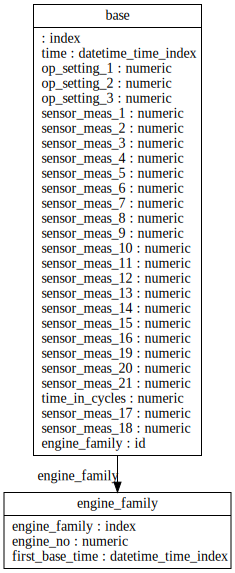

In [125]:
es.plot()

In [132]:
fm, features = ft.dfs(entityset=es,
               target_entity="base",
               max_depth=3,
                agg_primitives=None
#                n_jobs=-1,
#                features_only=True
              )

distributed.utils_perf - INFO - full garbage collection released 98.57 MB from 192 reference cycles (threshold: 10.00 MB)
distributed.utils_perf - INFO - full garbage collection released 183.21 MB from 198 reference cycles (threshold: 10.00 MB)
distributed.utils_perf - INFO - full garbage collection released 180.74 MB from 177 reference cycles (threshold: 10.00 MB)
distributed.utils_perf - INFO - full garbage collection released 196.24 MB from 184 reference cycles (threshold: 10.00 MB)
distributed.utils_perf - INFO - full garbage collection released 138.79 MB from 163 reference cycles (threshold: 10.00 MB)
distributed.utils_perf - INFO - full garbage collection released 162.79 MB from 191 reference cycles (threshold: 10.00 MB)


In [133]:
features

[<Feature: op_setting_1>,
 <Feature: op_setting_2>,
 <Feature: op_setting_3>,
 <Feature: sensor_meas_1>,
 <Feature: sensor_meas_2>,
 <Feature: sensor_meas_3>,
 <Feature: sensor_meas_4>,
 <Feature: sensor_meas_5>,
 <Feature: sensor_meas_6>,
 <Feature: sensor_meas_7>,
 <Feature: sensor_meas_8>,
 <Feature: sensor_meas_9>,
 <Feature: sensor_meas_10>,
 <Feature: sensor_meas_11>,
 <Feature: sensor_meas_12>,
 <Feature: sensor_meas_13>,
 <Feature: sensor_meas_14>,
 <Feature: sensor_meas_15>,
 <Feature: sensor_meas_16>,
 <Feature: sensor_meas_19>,
 <Feature: sensor_meas_20>,
 <Feature: sensor_meas_21>,
 <Feature: time_in_cycles>,
 <Feature: sensor_meas_17>,
 <Feature: sensor_meas_18>,
 <Feature: engine_family>,
 <Feature: DAY(time)>,
 <Feature: YEAR(time)>,
 <Feature: MONTH(time)>,
 <Feature: WEEKDAY(time)>,
 <Feature: engine_family.engine_no>,
 <Feature: engine_family.SUM(base.op_setting_1)>,
 <Feature: engine_family.SUM(base.op_setting_2)>,
 <Feature: engine_family.SUM(base.op_setting_3)>,
 <

In [134]:
fm

,op_setting_1,op_setting_2,op_setting_3,sensor_meas_1,sensor_meas_2,sensor_meas_3,sensor_meas_4,sensor_meas_5,sensor_meas_6,sensor_meas_7,...,engine_family.MONTH(first_base_time),engine_family.WEEKDAY(first_base_time),engine_family.NUM_UNIQUE(base.DAY(time)),engine_family.NUM_UNIQUE(base.YEAR(time)),engine_family.NUM_UNIQUE(base.MONTH(time)),engine_family.NUM_UNIQUE(base.WEEKDAY(time)),engine_family.MODE(base.DAY(time)),engine_family.MODE(base.YEAR(time)),engine_family.MODE(base.MONTH(time)),engine_family.MODE(base.WEEKDAY(time))
,,,,,,,,,,,,,,,,,,,,,
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,1,5,31,1,5,7,1,2000,1,0
1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,8.00,194.64,...,1,5,31,2,12,7,1,2000,1,5
2,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,21.61,553.97,...,1,5,31,1,6,7,1,2000,1,0
3,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,137.36,...,1,5,31,2,12,7,1,2000,1,0
4,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,332.10,...,1,5,31,2,12,7,1,2000,1,0
5,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,21.61,554.55,...,1,5,31,1,6,7,1,2000,1,0
6,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,1,5,31,1,5,7,1,2000,1,0
7,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,5.71,138.51,...,1,5,31,2,12,7,1,2000,1,5
8,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,9.02,175.71,...,1,5,31,2,12,7,1,2000,1,5
